Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
#Importing Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
#reading in the first dataframe with just the stations and fsq data
df_1 = pd.read_csv('gent_bike_stations_fsq.csv', index_col=False)
#reading in the second dataframe with the yelp data too
#df_2 = pd.read_csv('', index_col=False)

In [5]:
df_1.columns

Index(['station_id', 'station_name', 'latitude', 'longitude', 'empty_slots',
       'free_bikes', 'timestamp', 'station_uid', 'bars', 'museums',
       'restaurants', 'ratingbars', 'ratingmuseums', 'ratingrestaurants',
       'pricebars', 'pricerestaurants', 'popularitybars', 'popularitymuseums',
       'popularityrestaurants'],
      dtype='object')

In [ ]:
#df_2.columns

In [ ]:
#merging the two dataframes
#combined_df = df_2.merge(df_1, on='station_id', how='inner')

In [ ]:
#Removing the unnecessary columns
#combined_df_clean = combined_df.drop(columns=['Unnamed: 0',''])

In [6]:
#create new column for bike capacity 
df_1['bike_capacity'] = df_1['empty_slots'] + df_1['free_bikes']

In [7]:
#.info() to check for missing values, duplicates, and data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   station_id             406 non-null    object 
 1   station_name           406 non-null    object 
 2   latitude               406 non-null    float64
 3   longitude              406 non-null    float64
 4   empty_slots            406 non-null    int64  
 5   free_bikes             406 non-null    int64  
 6   timestamp              406 non-null    object 
 7   station_uid            406 non-null    int64  
 8   bars                   406 non-null    float64
 9   museums                406 non-null    float64
 10  restaurants            406 non-null    float64
 11  ratingbars             406 non-null    float64
 12  ratingmuseums          406 non-null    float64
 13  ratingrestaurants      406 non-null    float64
 14  pricebars              406 non-null    float64
 15  pricer

In [8]:
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'], format='ISO8601')

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   station_id             406 non-null    object             
 1   station_name           406 non-null    object             
 2   latitude               406 non-null    float64            
 3   longitude              406 non-null    float64            
 4   empty_slots            406 non-null    int64              
 5   free_bikes             406 non-null    int64              
 6   timestamp              406 non-null    datetime64[ns, UTC]
 7   station_uid            406 non-null    int64              
 8   bars                   406 non-null    float64            
 9   museums                406 non-null    float64            
 10  restaurants            406 non-null    float64            
 11  ratingbars             406 non-null    float64            

In [11]:
df_rel = df_1[['timestamp','station_id','bike_capacity','empty_slots','bars', 'museums', 'restaurants', 'ratingbars', 'ratingmuseums', 'ratingrestaurants', 'pricebars', 'pricerestaurants', 'popularitybars', 'popularitymuseums', 'popularityrestaurants']]

In [ ]:
#save this dataframe to csv

In [12]:
#.describe and look at the numeric columns 
df_rel.describe()

,bike_capacity,empty_slots,bars,museums,restaurants,ratingbars,ratingmuseums,ratingrestaurants,pricebars,pricerestaurants,popularitybars,popularitymuseums,popularityrestaurants
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,5.593596,4.280788,41.825123,8.874384,45.206897,7.490894,4.807512,7.903543,1.982759,1.828818,0.867337,0.647392,0.913568
std,4.350661,3.618195,12.957536,7.308475,10.101048,1.789578,3.569139,0.674697,0.130330,0.379580,0.139393,0.315542,0.102842
min,1.000000,0.000000,3.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.348171,0.000000,0.216744
25%,3.000000,2.000000,35.000000,2.000000,49.000000,7.610536,0.000000,7.506194,2.000000,2.000000,0.763303,0.566446,0.819487
50%,4.000000,3.000000,50.000000,8.000000,50.000000,7.946197,7.300000,7.950641,2.000000,2.000000,0.920236,0.687956,0.986576
75%,6.000000,6.000000,50.000000,16.000000,50.000000,8.330000,7.700000,8.444000,2.000000,2.000000,0.996842,0.903315,0.997257
max,30.000000,24.000000,50.000000,23.000000,50.000000,8.900000,8.200000,8.696000,2.500000,2.000000,0.997756,0.998633,0.997937


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'bike_capacity'}>,
        <Axes: title={'center': 'empty_slots'}>,
        <Axes: title={'center': 'bars'}>],
       [<Axes: title={'center': 'museums'}>,
        <Axes: title={'center': 'restaurants'}>,
        <Axes: title={'center': 'ratingbars'}>,
        <Axes: title={'center': 'ratingmuseums'}>],
       [<Axes: title={'center': 'ratingrestaurants'}>,
        <Axes: title={'center': 'pricebars'}>,
        <Axes: title={'center': 'pricerestaurants'}>,
        <Axes: title={'center': 'popularitybars'}>],
       [<Axes: title={'center': 'popularitymuseums'}>,
        <Axes: title={'center': 'popularityrestaurants'}>, <Axes: >,
        <Axes: >]], dtype=object)

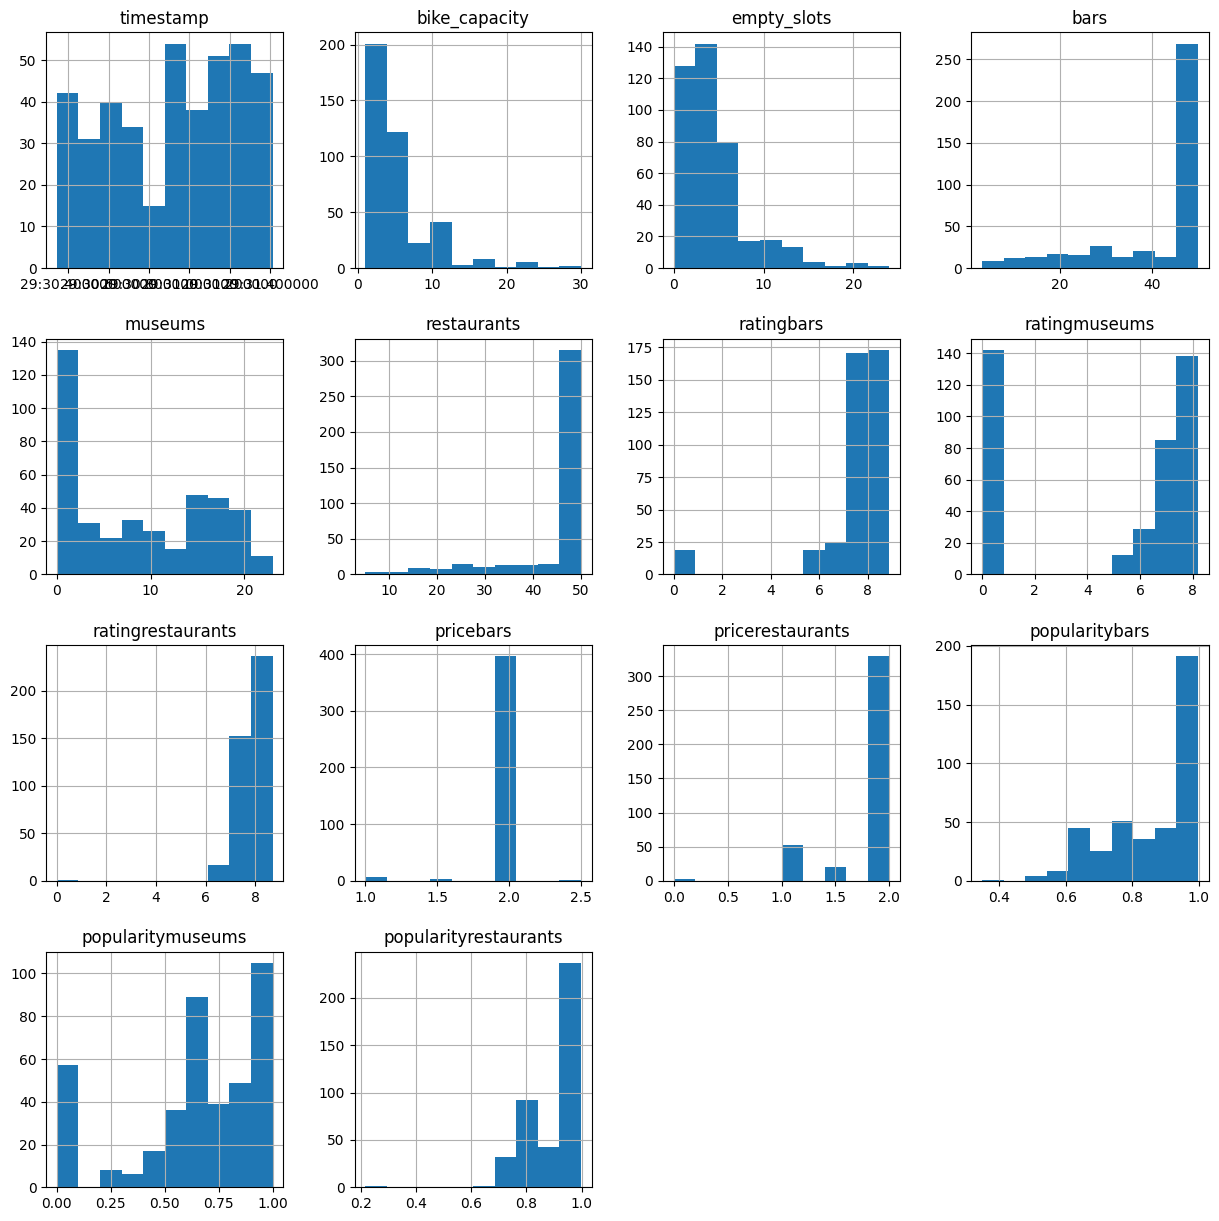

In [13]:
#Visualize numeric columns with histograms
df_rel.hist(figsize=(15,15))

In [17]:
#Visualize correlation between popularity of venues and bike capacity with a heatmap
corr_data = df_rel[['bike_capacity', 'popularitybars', 'popularitymuseums', 'popularityrestaurants']].corr()


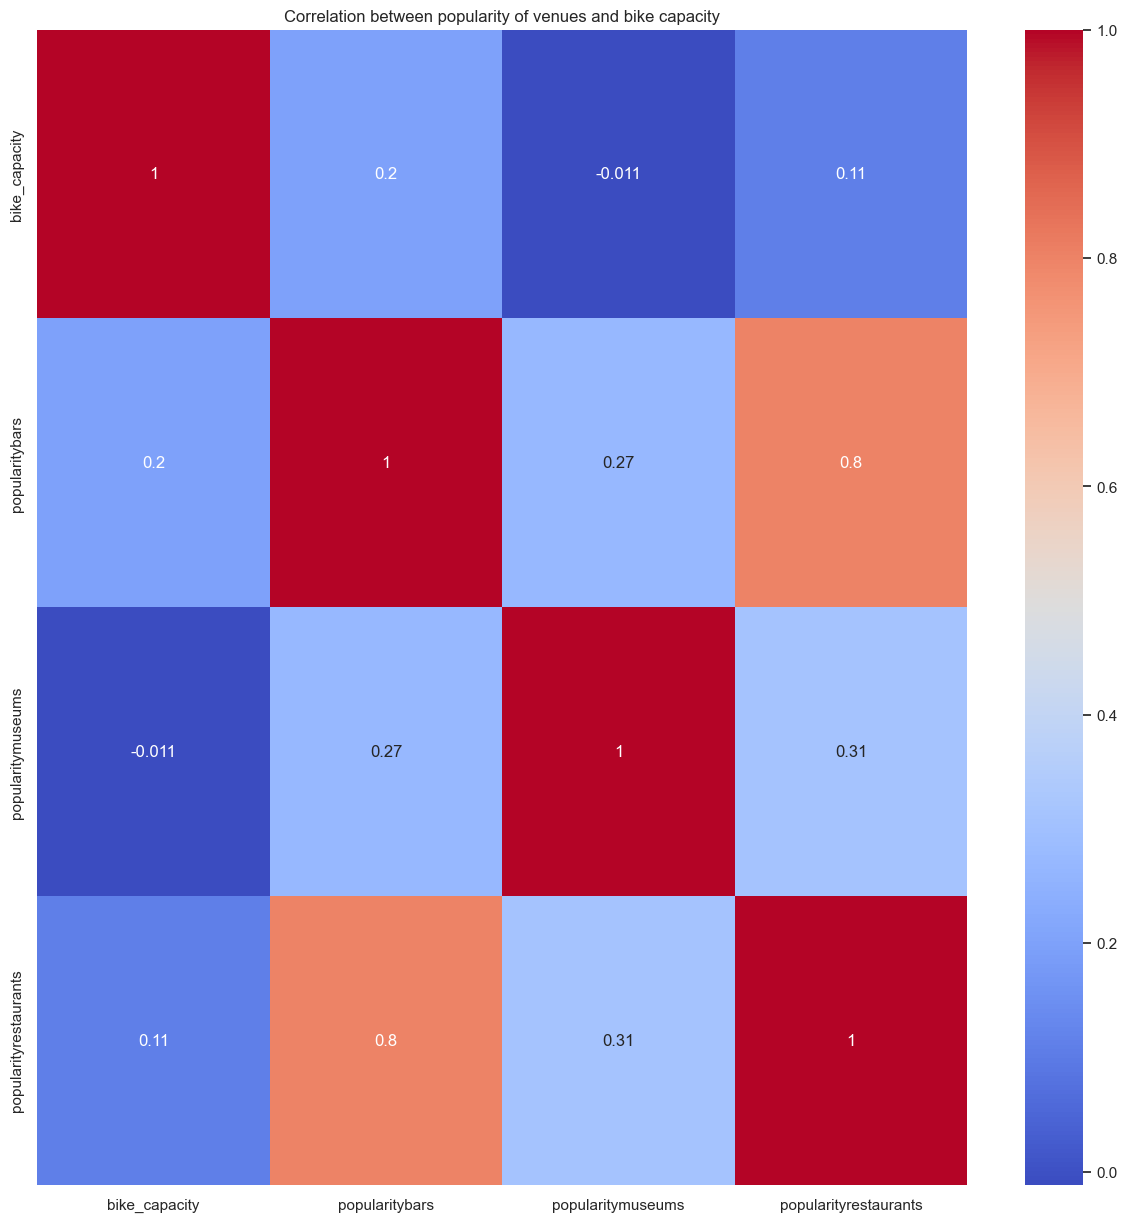

In [18]:
sns.set_theme(style="dark")
plt.figure(figsize=(15,15))
sns.heatmap(corr_data, annot=True, cmap='coolwarm') 
plt.title('Correlation between popularity of venues and bike capacity')
plt.show()

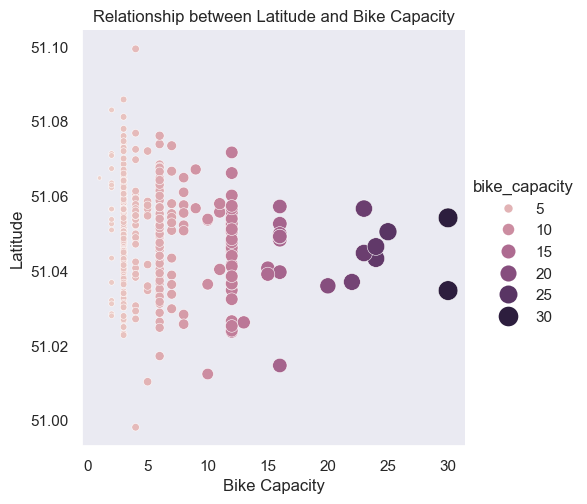

In [19]:
#Visuliaze the relationship between geographic location of stations and bike capacity
#Relativity plot

sns.set_theme(style="dark")
cmap = sns.cubehelix_palette(as_cmap=True)
gg = sns.relplot(data=df_1, x='bike_capacity', y='latitude', hue='bike_capacity', size='bike_capacity', sizes=(10, 200), palette=cmap)
gg.set_axis_labels('Bike Capacity', 'Latitude')
plt.title('Relationship between Latitude and Bike Capacity')
plt.show()

In [ ]:
sns.set_theme(style="dark")
cmap = sns.cubehelix_palette(as_cmap=True)
gg = sns.relplot(data=df_1, x='empty_slots', y='latitude', hue='empty_slots', size='bike_capacity', sizes=(10, 200), palette=cmap)
gg.set_axis_labels('Empty Slots', 'Latitude')
plt.title('Relationship between Latitude and Empty Slots due to occupied bikes')
plt.show()

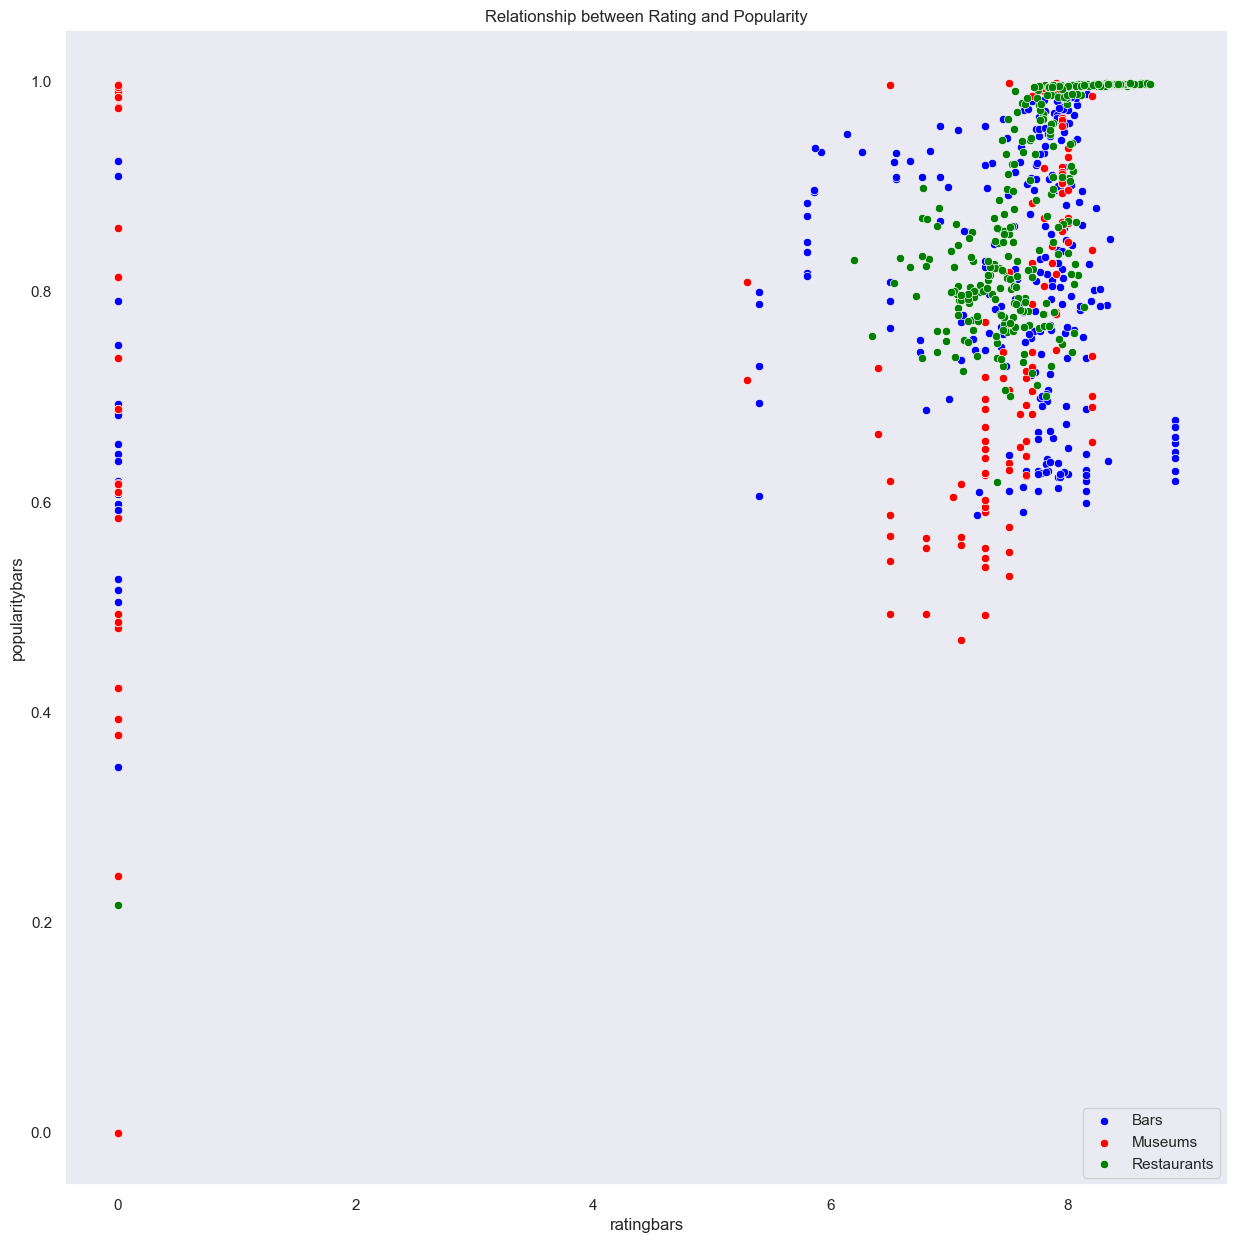

In [23]:
#Visualize the relationship between numeric columns with a scatterplot

#relationship between rating and popularity of bars, museums, and restaurants
sns.set_theme(style="dark")
plt.figure(figsize=(15,15))

# Plot relationship for bars
sns.scatterplot(data=df_rel, x='ratingbars', y='popularitybars', sizes=(10, 200), color='blue', label='Bars')

# Plot relationship for museums
# Replace 'ratingmuseums' and 'popularitymuseums' with the actual column names for museums
sns.scatterplot(data=df_rel, x='ratingmuseums', y='popularitymuseums', sizes=(10, 200), color='red', label='Museums')

# Plot relationship for restaurants
# Replace 'ratingrestaurants' and 'popularityrestaurants' with the actual column names for restaurants
sns.scatterplot(data=df_rel, x='ratingrestaurants', y='popularityrestaurants', sizes=(10, 200), color='green', label='Restaurants')

plt.title('Relationship between Rating and Popularity')
plt.legend()
plt.show()

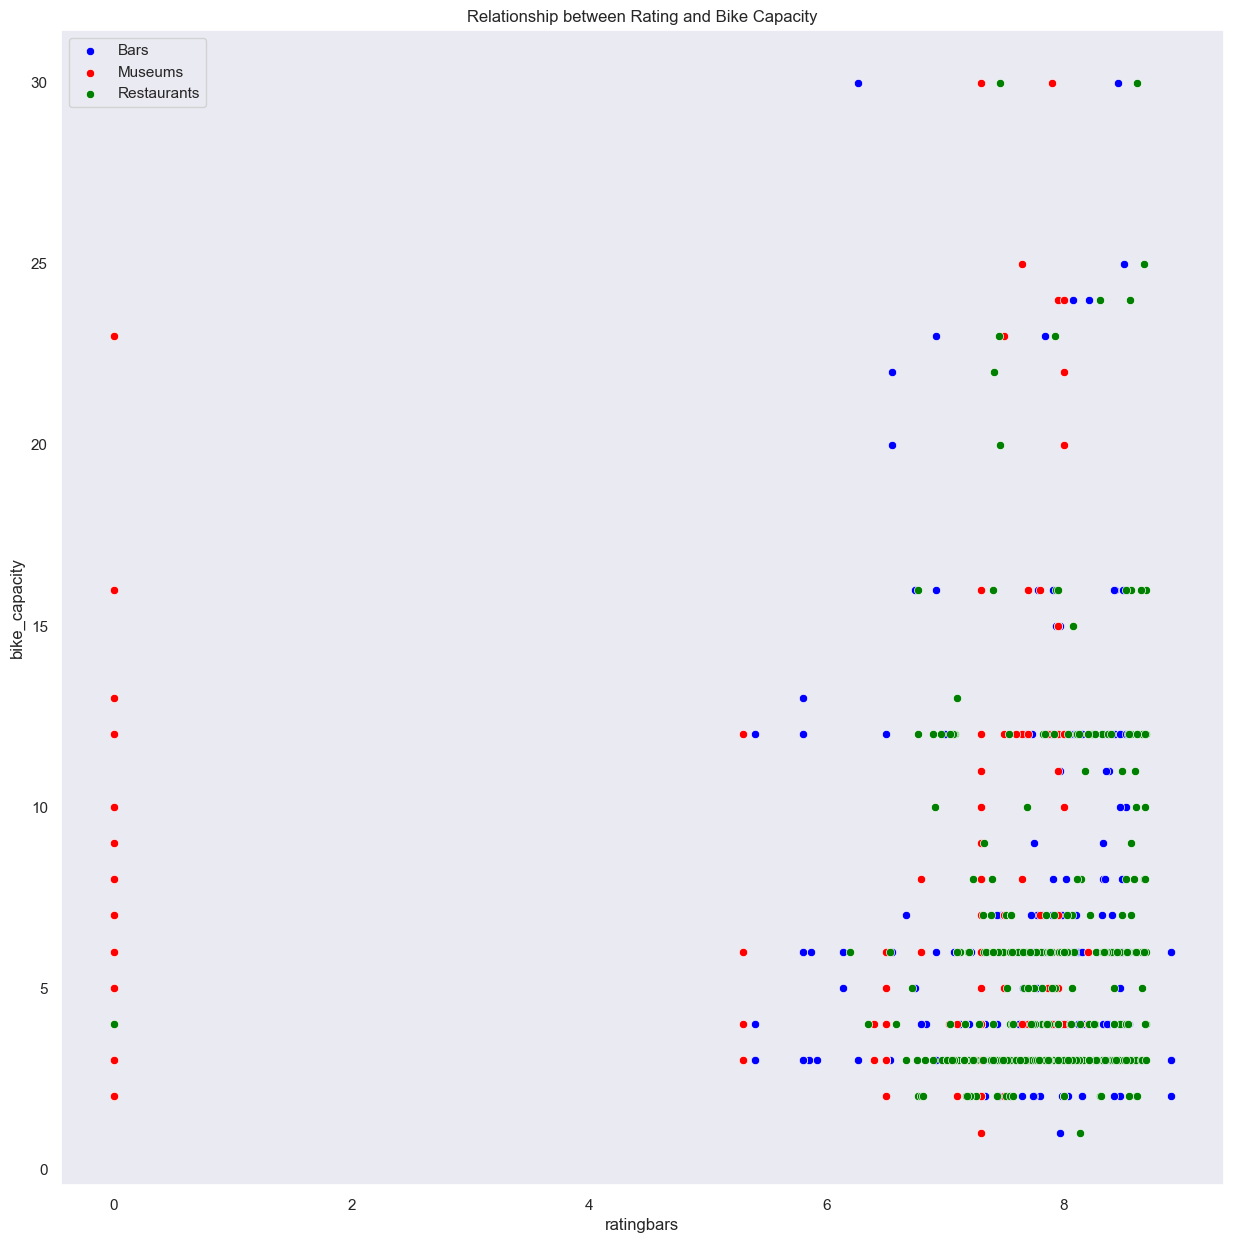

In [24]:
#relationship between rating and bike capacity of bars, museums, and restaurants
sns.set_theme(style="dark")
plt.figure(figsize=(15,15))

# Plot relationship for bars
# Replace 'bike_capacity_bars' with the actual column name for bike capacity for bars
sns.scatterplot(data=df_rel, x='ratingbars', y='bike_capacity', sizes=(10, 200), color='blue', label='Bars')

# Plot relationship for museums
# Replace 'ratingmuseums', 'bike_capacity_museums' with the actual column names for museums
sns.scatterplot(data=df_rel, x='ratingmuseums', y='bike_capacity', sizes=(10, 200), color='red', label='Museums')

# Plot relationship for restaurants
# Replace 'ratingrestaurants', 'bike_capacity_restaurants' with the actual column names for restaurants
sns.scatterplot(data=df_rel, x='ratingrestaurants', y='bike_capacity', sizes=(10, 200), color='green', label='Restaurants')

plt.title('Relationship between Rating and Bike Capacity')
plt.legend()
plt.show()

In [28]:
## Create a scatter plot on a geographic map
fig = px.scatter_geo(df_1,
                     lat='latitude',
                     lon='longitude',
                     size='empty_slots',
                     hover_name='station_name',
                     hover_data=['free_bikes', 'bars'],  # Additional data shown on hover
                     projection='natural earth',
                     title='Geographic Distribution of Bike Stations')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
#Visualize time series data with a line plot
# Filter to one station for a detailed plot
#Choosing the station in the busy/touristy area
#station_example = df_1[df_1['station_id'] == daily_data['station_id'].unique()[0]]

#fig = px.line(station_example, x='timestamp', y='free_bikes', title=f'Time Series of Free Bikes at Station {station_example["station_id"].iloc[0]}')
#fig.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [31]:
import sqlite3
from sqlite3 import Error

conn = sqlite3.connect('gent_bike_stations_fsq.db')
c = conn.cursor()
df_1.to_sql('gent_bike_stations_fsq', conn, if_exists='replace', index=False)

406

In [34]:
#Call the function to connect to the database
def create_connection(connection, query):
    try:
        c = connection.cursor()
        c.execute(query)
        connection.commit()
        print("Table created successfully")
    except Error as e:
        print(f"The error '{e}' occurred")


In [36]:
#Get the data from the database
sql = """
SELECT * FROM gent_bike_stations_fsq
"""

sql_q = create_connection(conn, sql)
print(sql_q)


Table created successfully
None
